As funções seguintes apresentam 3 **configurações de redes neuronais CNN**, a testar nas secções seguintes:

In [ ]:
def build_model_CNN1(filters, kernel_size,dropout,labels):
  model = models.Sequential()
  model.add(layers.Conv2D(filters, (kernel_size, kernel_size), activation='relu', input_shape=(50, 50, 1)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(filters, (kernel_size, kernel_size), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(filters, (kernel_size, kernel_size), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Flatten())
  model.add(layers.Dropout(dropout))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(16, activation='relu'))
  model.add(layers.Dense(labels, activation='softmax'))
  model.compile(optimizers.Adam(lr=0.00001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  return model

##### NOVO
A próxima CNN distingue-se pelo número de filtros nas camadas convolucionais, que vão duplicando:

In [ ]:
def build_model_CNN2(filters, kernel_size, dropout,labels):
  model = models.Sequential()
  model.add(layers.Conv2D(filters, (kernel_size, kernel_size), activation='relu', input_shape=(50, 50, 1)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(2*filters, (kernel_size, kernel_size), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(4*filters, (kernel_size, kernel_size), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Flatten())
  model.add(layers.Dropout(dropout))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(16, activation='relu'))
  model.add(layers.Dense(labels, activation='softmax'))
  model.compile(optimizers.Adam(lr=0.00001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  return model

In [ ]:
def build_model_CNN3(labels):
  #construct CNN structure
  model = Sequential()  
  #1st convolution layer
  model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(50,50,1)))
  model.add(MaxPooling2D(pool_size=(5,5), strides=(2, 2)))
  #2nd convolution layer
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))
  #3rd convolution layer
  model.add(Conv2D(128, (3, 3), activation='relu'))
  model.add(Conv2D(128, (3, 3), activation='relu'))
  model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))
  
  model.add(Flatten())
  #fully connected neural networks
  model.add(Dense(1024, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(1024, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(labels, activation='softmax'))
  model.compile(optimizers.Adam(lr=0.00001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  return model

### 11. Modelos deep learning
Esta secção apresenta modelos de **redes neuronais convolucionais** (CNN), historicamente adequadas para a <u>classificação de imagens</u>.

#### 11.1 CNN: label com 2 classes
De seguida são apresentadas 5 versões de CNN para classificar as imagens em:
* 0 - Normal
* 1 - Cancer


O primeiro modelo usa 3 camadas convolucionais de 64 filtros e tamanho do núcleo 5, intercaladas com pooling:

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 46, 46, 64)        1664      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 19, 19, 64)        102464    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 64)          102464    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)              

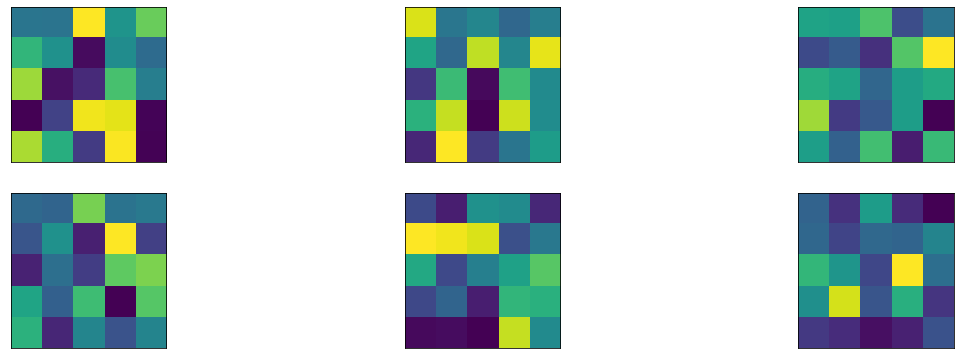

32284/32284 [==============================] - 3s 98us/step
[0.47849705263283626, 0.776390790939331]


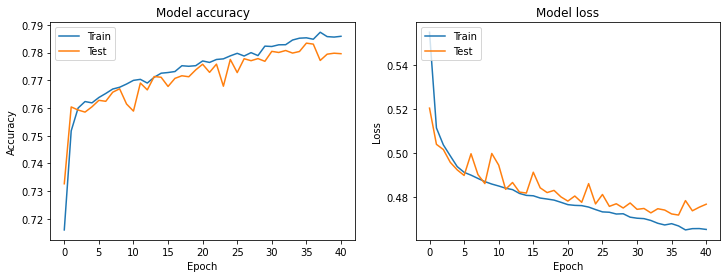

In [ ]:
from keras import datasets, layers, models, optimizers
from sklearn.utils.multiclass import unique_labels
import torch
model1=build_model_CNN1(64, 5, 0,2)
model1.summary()
tf.keras.utils.plot_model(model1, "model1.png", show_shapes = True)
history1=model1.fit(X_train, y_train, epochs=50,validation_data=(X_val,y_val),callbacks = callbacks)
camadas(model1)
output_metrics(model1,history1,X_test, y_test)
model_save_name = 'model1.h5'
path = F"/content/{model_save_name}" 
torch.save(model1, path)
history_pickle=[]
history_pickle.append(history1)
import pickle
with open('history.pickle', 'wb') as f:
    pickle.dump([history_pickle], f)

O modelo atinge uma **precisão global de 77.63%**,

A matriz de confusão evidencia que o erro está essencialmente associado à capacidade do modelo distinguir pneumonia viral de bacteriana.

Os gráficos convergem após 6 epochs, <u>não revelando overfitting</u> significativo. No entanto, foi testada a seguir uma versão com **50% de dropout**, reduzindo também o tamanho do núcleo de 5 para 3:

Train on 52729 samples, validate on 22599 samples
Epoch 1/50
52729/52729 [==============================] - 14s 259us/step - loss: 0.5980 - accuracy: 0.6854 - val_loss: 0.5614 - val_accuracy: 0.7154
Epoch 2/50
52729/52729 [==============================] - 13s 248us/step - loss: 0.5369 - accuracy: 0.7222 - val_loss: 0.5131 - val_accuracy: 0.7518
Epoch 3/50
52729/52729 [==============================] - 13s 249us/step - loss: 0.5088 - accuracy: 0.7526 - val_loss: 0.5061 - val_accuracy: 0.7555
Epoch 4/50
52729/52729 [==============================] - 14s 258us/step - loss: 0.5036 - accuracy: 0.7540 - val_loss: 0.4980 - val_accuracy: 0.7558
Epoch 5/50
52729/52729 [==============================] - 13s 249us/step - loss: 0.4998 - accuracy: 0.7561 - val_loss: 0.4959 - val_accuracy: 0.7549
Epoch 6/50
52729/52729 [==============================] - 13s 247us/step - loss: 0.4971 - accuracy: 0.7589 - val_loss: 0.4950 - val_accuracy: 0.7614
Epoch 7/50
52729/52729 [==============================] 

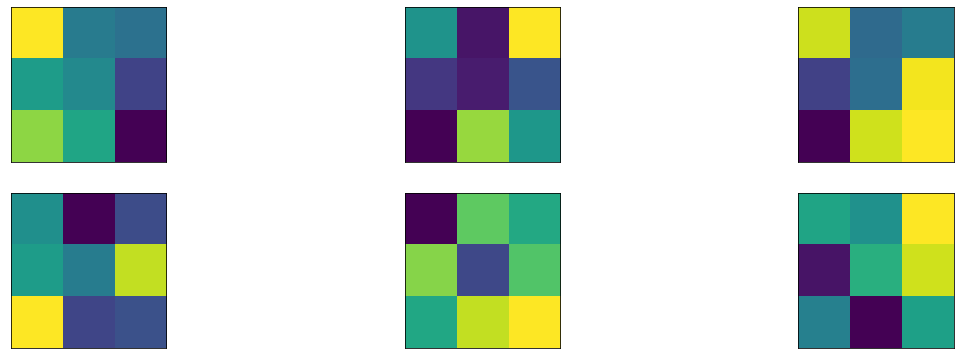

32284/32284 [==============================] - 3s 94us/step
[0.46002661105854153, 0.7938607335090637]


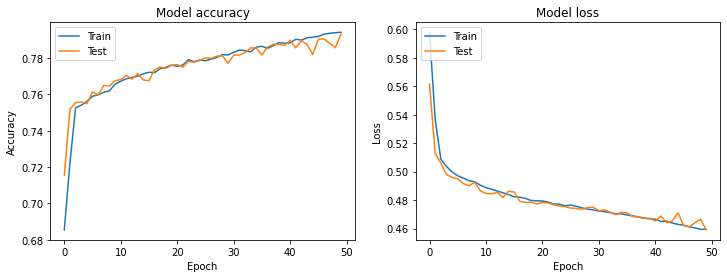

In [ ]:
model2=build_model_CNN1(64, 3, 0.5, 2)
history2=model2.fit(X_train, y_train, epochs=50,validation_data=(X_val,y_val))
model2.summary()
camadas(model2)
output_metrics(model2,history2,X_test, y_test)
model_save_name = 'model2.sav'
path = F"/content/{model_save_name}" 
torch.save(model2, path)
tf.keras.utils.plot_model(model2, "model2.png", show_shapes = True)
history_pickle.append(history2)
with open('history.pickle', 'wb') as f:
    pickle.dump([history_pickle], f)

O modelo atinge uma **precisão global de 79.38%**, identificando **79.38% dos casos cancer**.
A redução do núcleo revelou-se vantajosa (apesar do dropout), pelo que será usado um <u>núcleo de tamanho 3</u> nos seguintes modelos.

A matriz de confusão evidencia que o erro está essencialmente associado à capacidade do modelo distinguir cancer de mama.

Os gráficos <u>não revelam overfitting</u>.

---

O modelo seguinte é composto por 3 camadas convolucionais, intercaladas com pooling, mas com filtros distintos: 32, 64 e 128.





Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 9, 9, 128)         73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2048)             

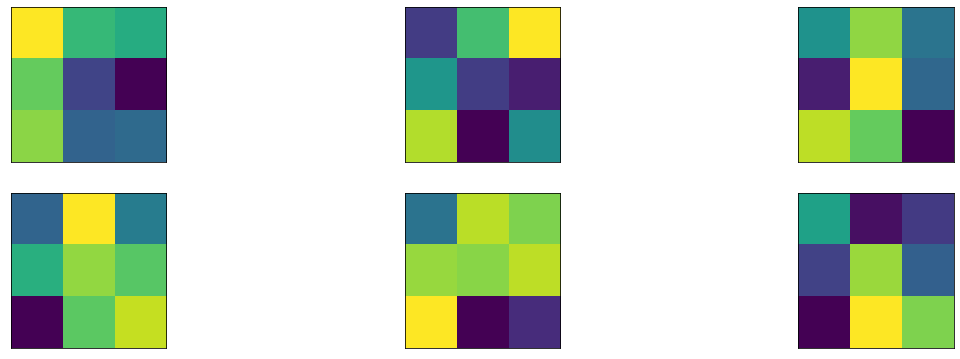

32284/32284 [==============================] - 3s 89us/step
[0.46185281183356, 0.787944495677948]


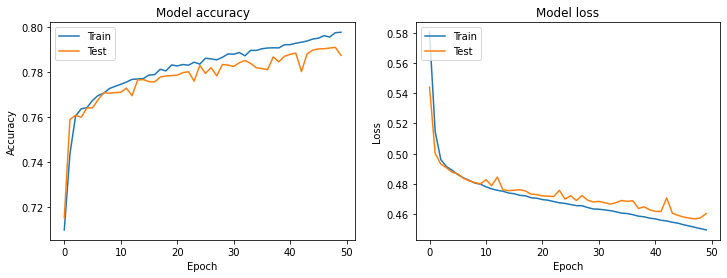

In [ ]:
model3=build_model_CNN2(32,3,0, 2)
model3.summary()
history3=model3.fit(X_train, y_train, epochs=50,validation_data=(X_val,y_val),callbacks = callbacks)
camadas(model3)
output_metrics(model3,history3,X_test, y_test)
model_save_name = 'model3.sav'
path = F"/content/{model_save_name}" 
torch.save(model3, path)
tf.keras.utils.plot_model(model3, "model3.png", show_shapes = True)

history_pickle.append(history3)
with open('history.pickle', 'wb') as f:
    pickle.dump([history_pickle], f)

O modelo atinge uma **precisão global de 77.67%**.

Mais uma vez, a matriz de confusão evidencia que o erro está essencialmente associado à capacidade do modelo distinguircancer de mama.

Os gráficos <u>revelam ligeiro overfitting</u>, convergindo após 6 epochs.

---
O quarto modelo pretende <u>controlar o ligeiro overfitting</u> do modelo anterior, incluindo uma camada de **dropout** de 20%:



Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 48, 48, 32)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 9, 9, 128)         73856     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 2048)             

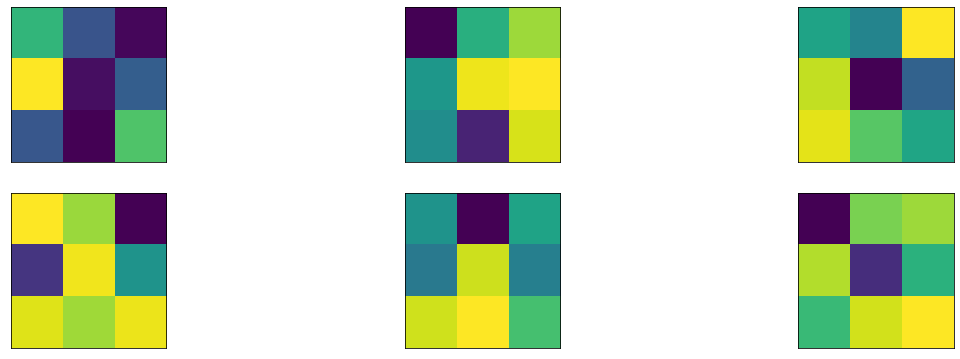

32284/32284 [==============================] - 3s 90us/step
[0.4570424412502378, 0.7942944169044495]


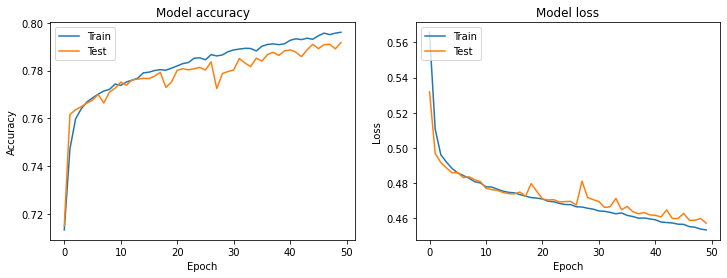

In [ ]:
model4=build_model_CNN2(32,3,0.2,2 )
model4.summary()
history4=model4.fit(X_train, y_train, epochs=50,validation_data=(X_val,y_val),callbacks = callbacks)
camadas(model4)
output_metrics(model4,history4,X_test, y_test)
model_save_name = 'model4.sav'
path = F"/content/{model_save_name}" 
torch.save(model4, path)
tf.keras.utils.plot_model(model4, "model4.png", show_shapes = True)
#batch_size=512
#83%+83%
history_pickle.append(history4)
with open('history.pickle', 'wb') as f:
    pickle.dump([history_pickle], f)

O modelo atinge uma **precisão global de 79.42%**.
Não se verificam diferenças com a camada de dropout em relação à versão anterior.

---


O próximo modelo é um pouco **mais complexo**. Começa por uma camada convolucional de 64 filtros, seguida de pooling, depois 2 camadas convolucionais de 64 filtros seguidas de pooling e, por fim, 2 camadas convolucionais de 128  filtros, seguida de pooling. Não apresenta controlo de overfitting.



Train on 52729 samples, validate on 22599 samples
Epoch 1/50
52729/52729 [==============================] - 16s 311us/step - loss: 0.5517 - accuracy: 0.7229 - val_loss: 0.5131 - val_accuracy: 0.7456
Epoch 2/50
52729/52729 [==============================] - 16s 299us/step - loss: 0.5038 - accuracy: 0.7586 - val_loss: 0.5053 - val_accuracy: 0.7476
Epoch 3/50
52729/52729 [==============================] - 16s 298us/step - loss: 0.4982 - accuracy: 0.7625 - val_loss: 0.4950 - val_accuracy: 0.7655
Epoch 4/50
52729/52729 [==============================] - 16s 298us/step - loss: 0.4947 - accuracy: 0.7649 - val_loss: 0.4931 - val_accuracy: 0.7629
Epoch 5/50
52729/52729 [==============================] - 16s 298us/step - loss: 0.4915 - accuracy: 0.7676 - val_loss: 0.4895 - val_accuracy: 0.7668
Epoch 6/50
52729/52729 [==============================] - 16s 305us/step - loss: 0.4889 - accuracy: 0.7706 - val_loss: 0.4852 - val_accuracy: 0.7736
Epoch 7/50
52729/52729 [==============================] 

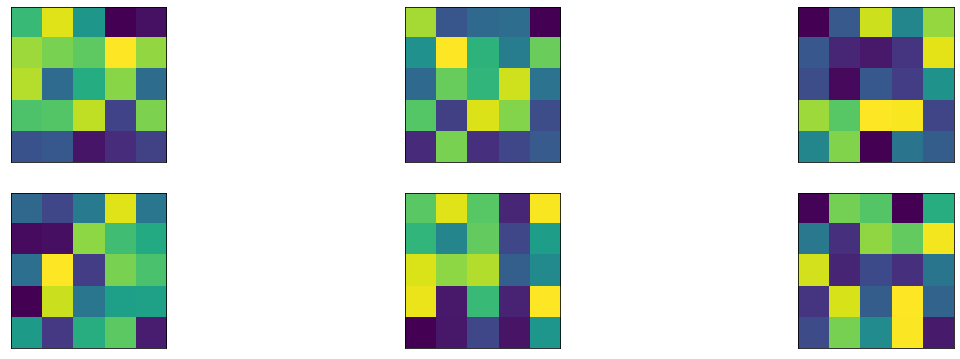

32284/32284 [==============================] - 3s 103us/step
[0.44953856226266825, 0.7990955114364624]


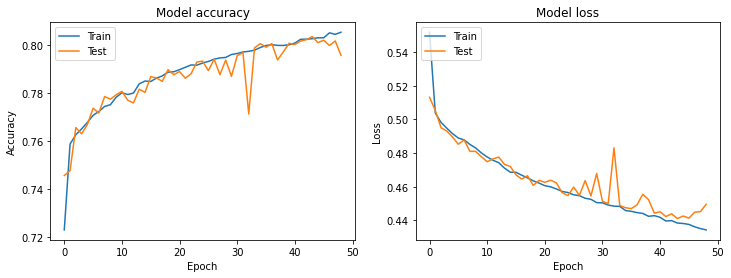

In [ ]:
from keras.models import Model,Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D,MaxPool2D, Flatten, Embedding, Dropout,BatchNormalization
model5=build_model_CNN3(2)
history5=model5.fit(X_train, y_train, epochs=50,validation_data=(X_val,y_val),callbacks = callbacks)
model5.summary()
camadas(model5)
output_metrics(model5,history5,X_test, y_test)
model_save_name = 'model5.sav'
path = F"/content/{model_save_name}" 
torch.save(model5, path)
tf.keras.utils.plot_model(model5, "model5.png", show_shapes = True)


history_pickle.append(history5)
with open('history.pickle', 'wb') as f:
    pickle.dump([history_pickle], f)

O modelo tem uma performance aglobal de **78.68%**.

Mais uma vez, o erro está essencialmente associado à capacidade do modelo distinguir pneumonia viral de bacteriana.

Os gráficos apresentam, no entanto, <u>overfitting</u> após 6 epochs.


#### 11.2 API funcional

In [ ]:
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D,AveragePooling2D
from keras.layers.merge import concatenate

def build_model_CNN_API_1(labels):
  visible = Input(shape=(50,50,1))
  # first feature extractor
  conv1 = Conv2D(64, kernel_size=4, activation='relu')(visible)
  pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
  conv2 = Conv2D(64, kernel_size=4, activation='relu')(pool1)
  pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
  conv3 = Conv2D(64, kernel_size=4, activation='relu')(pool2)
  pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
  flat1 = Flatten()(pool3)
  # second feature extractor

  conv2_1 = Conv2D(32, kernel_size=4, activation='relu')(visible)
  pool2_1 = AveragePooling2D(pool_size=(2, 2))(conv2_1)
  conv2_2 = Conv2D(32, kernel_size=4, activation='relu')(pool2_1)
  pool2_2 = AveragePooling2D(pool_size=(2, 2))(conv2_2)
  conv2_3 = Conv2D(32, kernel_size=4, activation='relu')(pool2_2)
  pool2_2 = AveragePooling2D(pool_size=(2, 2))(conv2_3)
  flat2 = Flatten()(pool2_2)
  # merge feature extractors
  merge = concatenate([flat1, flat2])
  # interpretation layer
  hidden1 = Dense(128, activation='relu')(merge)
  hidden2 = Dense(64, activation='relu')(hidden1)
  hidden3 = Dense(32, activation='relu')(hidden2)    
  # prediction output
  output = Dense(labels, activation='sigmoid')(hidden3)
  model = Model(inputs=visible, outputs=output)
  model.compile(optimizers.Adam(lr=0.00001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  return model

Train on 52729 samples, validate on 22599 samples
Epoch 1/50
52729/52729 [==============================] - 19s 359us/step - loss: 0.5679 - accuracy: 0.7122 - val_loss: 0.5386 - val_accuracy: 0.7151
Epoch 2/50
52729/52729 [==============================] - 18s 345us/step - loss: 0.5166 - accuracy: 0.7392 - val_loss: 0.5015 - val_accuracy: 0.7572
Epoch 3/50
52729/52729 [==============================] - 18s 345us/step - loss: 0.4981 - accuracy: 0.7586 - val_loss: 0.4963 - val_accuracy: 0.7562
Epoch 4/50
52729/52729 [==============================] - 18s 344us/step - loss: 0.4929 - accuracy: 0.7621 - val_loss: 0.4905 - val_accuracy: 0.7623
Epoch 5/50
52729/52729 [==============================] - 18s 344us/step - loss: 0.4902 - accuracy: 0.7650 - val_loss: 0.4905 - val_accuracy: 0.7594
Epoch 6/50
52729/52729 [==============================] - 18s 345us/step - loss: 0.4878 - accuracy: 0.7681 - val_loss: 0.4854 - val_accuracy: 0.7676
Epoch 7/50
52729/52729 [==============================] 

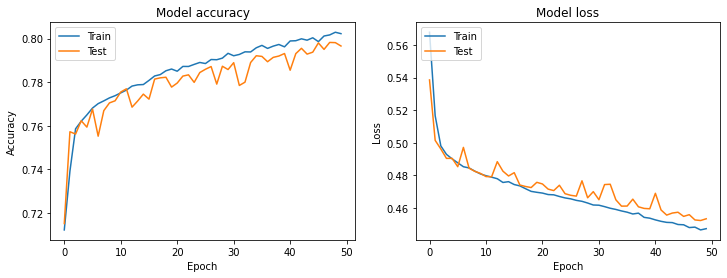

In [ ]:
model_CNN_API_1=build_model_CNN_API_1(2)
history_model_CNN_API_1=model_CNN_API_1.fit(X_train, y_train, epochs=50,validation_data=(X_val,y_val))
model_CNN_API_1.summary()
#camadas(model_CNN_API_1)
output_metrics(model_CNN_API_1,history_model_CNN_API_1,X_test, y_test)
model_save_name = 'model_CNN_API_1.sav'
path = F"/content/{model_save_name}" 
torch.save(model_CNN_API_1, path)
tf.keras.utils.plot_model(model_CNN_API_1, "model_CNN_API_1.png", show_shapes = True)

history_pickle.append(history_model_CNN_API_1)
with open('history.pickle', 'wb') as f:
    pickle.dump([history_pickle], f)


O modelo tem uma performance aglobal de **78.58%**.

Testam-se adicionalmente segundo redes, usando a API funcional:

In [ ]:
def build_model_CNN_API_2(labels):
  visible = Input(shape=(50,50,1))
  # first feature extractor
  conv1 = Conv2D(64, kernel_size=4, activation='relu')(visible)
  pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
  conv2 = Conv2D(64, kernel_size=4, activation='relu')(pool1)
  pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
  conv3 = Conv2D(64, kernel_size=4, activation='relu')(pool2)
  pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
  flat1 = Flatten()(pool3)
  # second feature extractor

  conv2_1 = Conv2D(32, kernel_size=4, activation='relu')(visible)
  pool2_1 = AveragePooling2D(pool_size=(2, 2))(conv2_1)
  conv2_2 = Conv2D(32, kernel_size=4, activation='relu')(pool2_1)
  pool2_2 = AveragePooling2D(pool_size=(2, 2))(conv2_2)
  conv2_3 = Conv2D(32, kernel_size=4, activation='relu')(pool2_2)
  pool2_2 = AveragePooling2D(pool_size=(2, 2))(conv2_3)
  flat2 = Flatten()(pool2_2)
  # merge feature extractors
  merge = concatenate([flat1, flat2])
  # interpretation layer
  hidden1 = Dense(128, activation='relu')(merge)
  hidden2 = Dense(64, activation='relu',)(hidden1)
  hidden3 = Dense(32, activation='relu')(hidden2)
  hidden4 = Dense(16, activation='relu')(hidden3)
  hidden5 = Dense(32, activation='relu')(hidden4)
  hidden6 = Dense(16, activation='relu')(hidden5)
  hidden7 = Dense(8, activation='relu')(hidden6)

  hidden1_1 = Dense(128, activation='relu')(merge)
  hidden2_1 = Dense(64, activation='relu')(hidden1_1)
  hidden3_1 = Dense(32, activation='relu')(hidden2_1)
  hidden4_1 = Dense(32, activation='relu')(hidden3_1)

  concatenated = concatenate([hidden3, hidden4_1])

  output = Dense(labels, activation='sigmoid')(concatenated)
  model = Model(inputs=visible, outputs=output)
  model.compile(optimizers.Adam(lr=0.00001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  return model

Train on 52729 samples, validate on 22599 samples
Epoch 1/50
52729/52729 [==============================] - 21s 395us/step - loss: 0.5618 - accuracy: 0.7136 - val_loss: 0.5246 - val_accuracy: 0.7150
Epoch 2/50
52729/52729 [==============================] - 20s 385us/step - loss: 0.5090 - accuracy: 0.7483 - val_loss: 0.5003 - val_accuracy: 0.7549
Epoch 3/50
52729/52729 [==============================] - 20s 388us/step - loss: 0.4979 - accuracy: 0.7611 - val_loss: 0.4939 - val_accuracy: 0.7590
Epoch 4/50
52729/52729 [==============================] - 21s 389us/step - loss: 0.4933 - accuracy: 0.7622 - val_loss: 0.4903 - val_accuracy: 0.7648
Epoch 5/50
52729/52729 [==============================] - 20s 387us/step - loss: 0.4894 - accuracy: 0.7674 - val_loss: 0.4885 - val_accuracy: 0.7665
Epoch 6/50
52729/52729 [==============================] - 20s 385us/step - loss: 0.4869 - accuracy: 0.7679 - val_loss: 0.4852 - val_accuracy: 0.7672
Epoch 7/50
52729/52729 [==============================] 

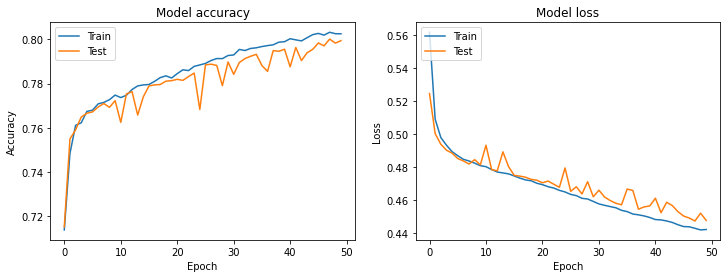

In [ ]:
model_CNN_API_2=build_model_CNN_API_2(2)
history_model_CNN_API_2=model_CNN_API_2.fit(X_train, y_train, epochs=50,validation_data=(X_val,y_val))
model_CNN_API_2.summary()
#camadas(model_CNN_API_2)
output_metrics(model_CNN_API_2,history_model_CNN_API_2,X_test, y_test)
model_save_name = 'model_CNN_API_2.sav'
path = F"/content/{model_save_name}" 
torch.save(model_CNN_API_2, path)
tf.keras.utils.plot_model(model_CNN_API_2, "model_CNN_API_2.png", show_shapes = True)

history_pickle.append(history_model_CNN_API_2)
with open('history.pickle', 'wb') as f:
    pickle.dump([history_pickle], f)

Os resultados obtidos estão em linha com as CNN anteriormente testadas, rondando os 78.98% de accuracy global.

### 15.3 Versão 3

In [ ]:
visible = Input(shape=(50,50,1))
# first feature extractor
conv1 = Conv2D(64, kernel_size=3, activation='relu')(visible)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(64, kernel_size=3, activation='relu')(pool1)
conv3 = Conv2D(64, kernel_size=3, activation='relu')(conv2)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
flat1 = Flatten()(pool3)

# second feature extractor
conv2_1 = Conv2D(64, kernel_size=3, activation='relu')(visible)
batc2_1= BatchNormalization()(conv2_1)
pool2_1 = MaxPooling2D(pool_size=(2, 2))(batc2_1)
drop2_1=Dropout(0.5)(pool2_1)
conv2_2 = Conv2D(64, kernel_size=3, activation='relu')(drop2_1)
batc2_2= BatchNormalization()(conv2_2)
conv2_3 = Conv2D(64, kernel_size=3, activation='relu')(batc2_2)
batc2_3= BatchNormalization()(conv2_3)
pool2_2 = MaxPooling2D(pool_size=(2, 2))(batc2_3)
drop2_2=Dropout(0.5)(pool2_2)
conv2_4 = Conv2D(128, kernel_size=4, activation='relu')(drop2_2)
batc2_3= BatchNormalization()(conv2_4)
conv2_5 = Conv2D(128, kernel_size=4, activation='relu')(batc2_3)
batc2_4= BatchNormalization()(conv2_5)
pool2_3 = MaxPooling2D(pool_size=(2, 2))(batc2_4)
drop2_3=Dropout(0.5)(pool2_3)

flat2 = Flatten()(pool2_3)
# merge feature extractors
merge = concatenate([flat1, flat2])
# interpretation layer
drop2_4=Dropout(0.5)(merge)
hidden1 = Dense(128, activation='relu')(drop2_4)
hidden2 = Dense(64, activation='relu')(hidden1)
hidden3 = Dense(32, activation='relu')(hidden2)    
# prediction output
output = Dense(2, activation='softmax')(hidden3)
model11 = Model(inputs=visible, outputs=output)
model11.compile(optimizers.Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history11=model11.fit(X_train, y_train, epochs=50,validation_data=(X_val,y_val),callbacks = callbacks, verbose=0)

Epoch 00011: early stopping


Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 50, 50, 1)    0                                            
__________________________________________________________________________________________________
conv2d_66 (Conv2D)              (None, 48, 48, 64)   640         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 48, 48, 64)   256         conv2d_66[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_52 (MaxPooling2D) (None, 24, 24, 64)   0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

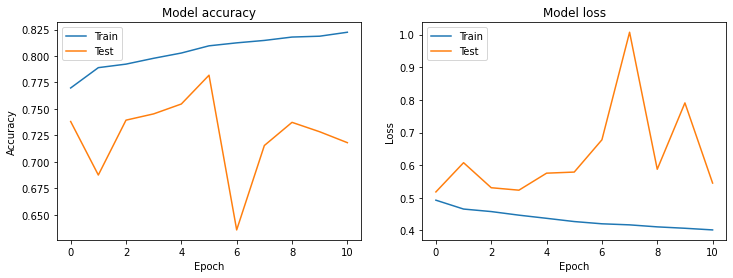

In [ ]:
model11.summary()
output_metrics(model11,history11,X_test, y_test)

In [ ]:
model_save_name = 'model11.sav'
path = F"/content/{model_save_name}" 
torch.save(model11, path)
tf.keras.utils.plot_model(model11, "model11.png", show_shapes = True)


history_pickle.append(history11)
with open('history.pickle', 'wb') as f:
    pickle.dump([history_pickle], f)